In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df_gender = pd.read_csv('C:/Users/dstarasov/Desktop/stepik/task/DS/titanic/gender.csv')

In [3]:
df_gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [4]:
df_train = pd.read_csv('C:/Users/dstarasov/Desktop/stepik/task/DS/titanic/train.csv')

In [5]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df_test = pd.read_csv('C:/Users/dstarasov/Desktop/stepik/task/DS/titanic/test.csv')

In [7]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
X = df_train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Survived'], axis = 1)

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X= pd.get_dummies(X)
X = X.fillna({'Age' : X.Age.median()})
y = df_train.Survived

In [11]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [12]:
clf.score(X,y)

0.8496071829405163

[Text(2822.4418604651164, 1245.75, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(1395.0, 1019.25, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(648.8372093023256, 792.75, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(389.30232558139534, 566.25, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(259.5348837209302, 339.75, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(129.7674418604651, 113.25, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(389.30232558139534, 113.25, 'entropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(519.0697674418604, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(908.3720930232557, 566.25, 'Age <= 2.5\nentropy = 0.141\nsamples = 100\nvalue = [2, 98]'),
 Text(778.6046511627907, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1038.139534883721, 339.75, 'Parch <= 1.5\nentropy = 0.081\nsamples = 99

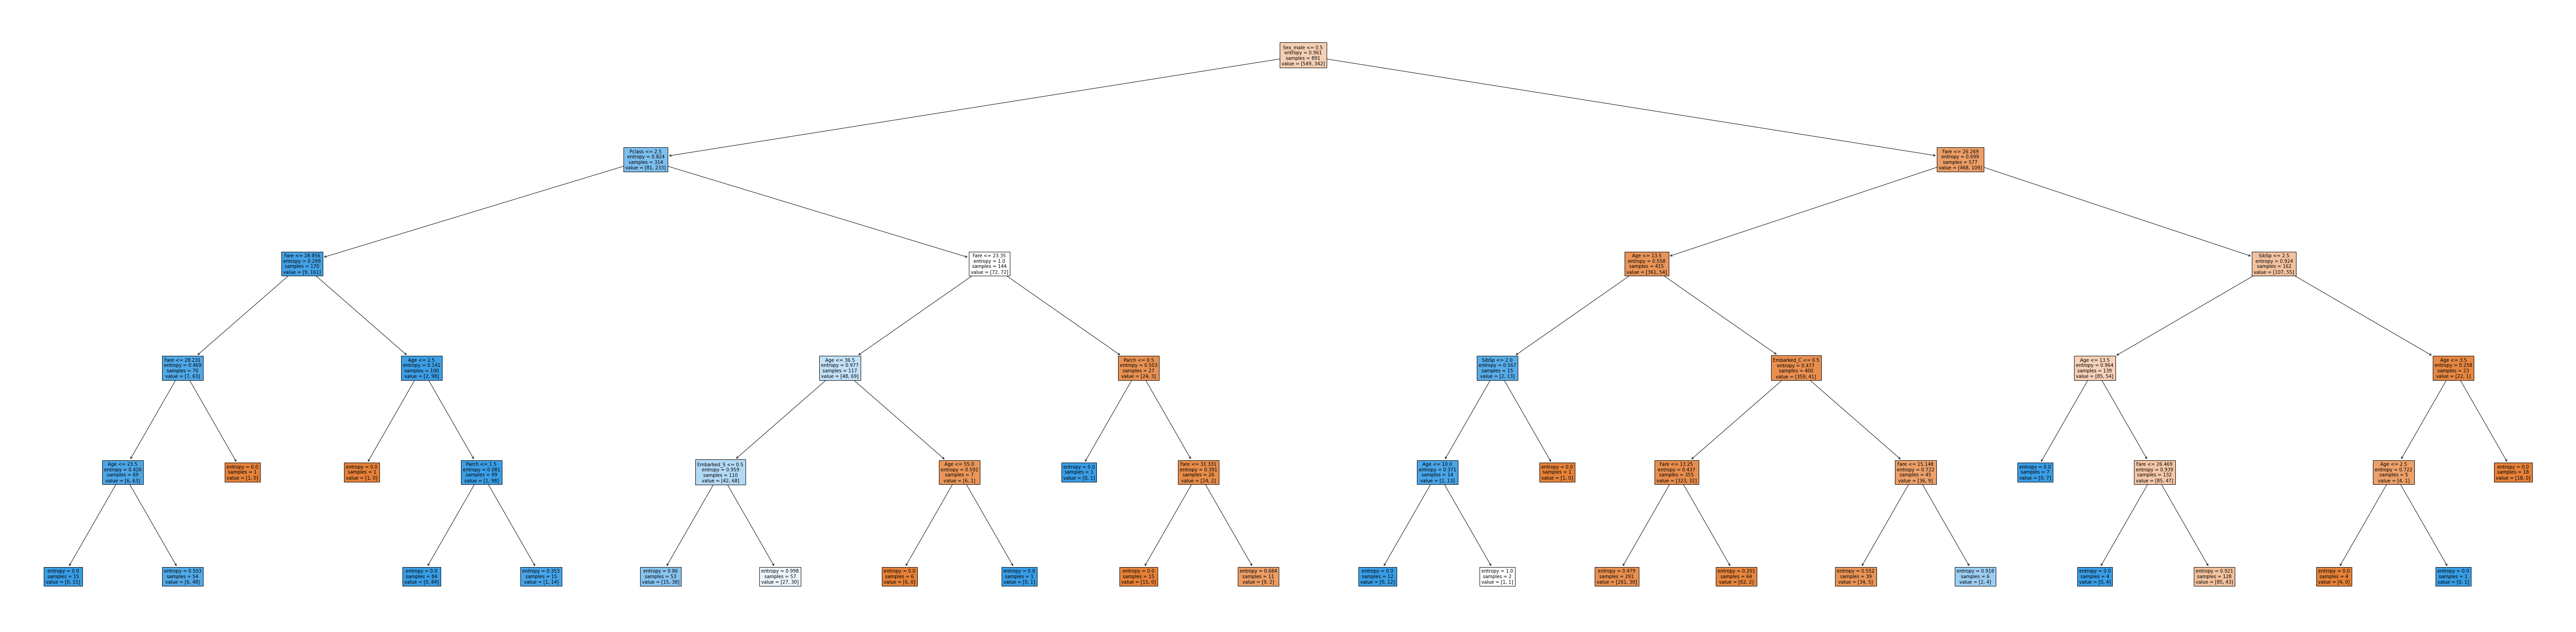

In [13]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.33, random_state= 42)

In [15]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
clf.score(X_train,y_train)

0.8238255033557047

[Text(2790.0, 1189.125, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(1395.0, 849.375, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(697.5, 509.625, 'SibSp <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(348.75, 169.875, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(1046.25, 169.875, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(2092.5, 509.625, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(1743.75, 169.875, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(2441.25, 169.875, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(4185.0, 849.375, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(3487.5, 509.625, 'Age <= 2.5\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(3138.75, 169.875, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(3836.25, 169.875, 'entropy = 0.187\nsamples = 105\nvalue = [3, 102]'),
 Text(4882

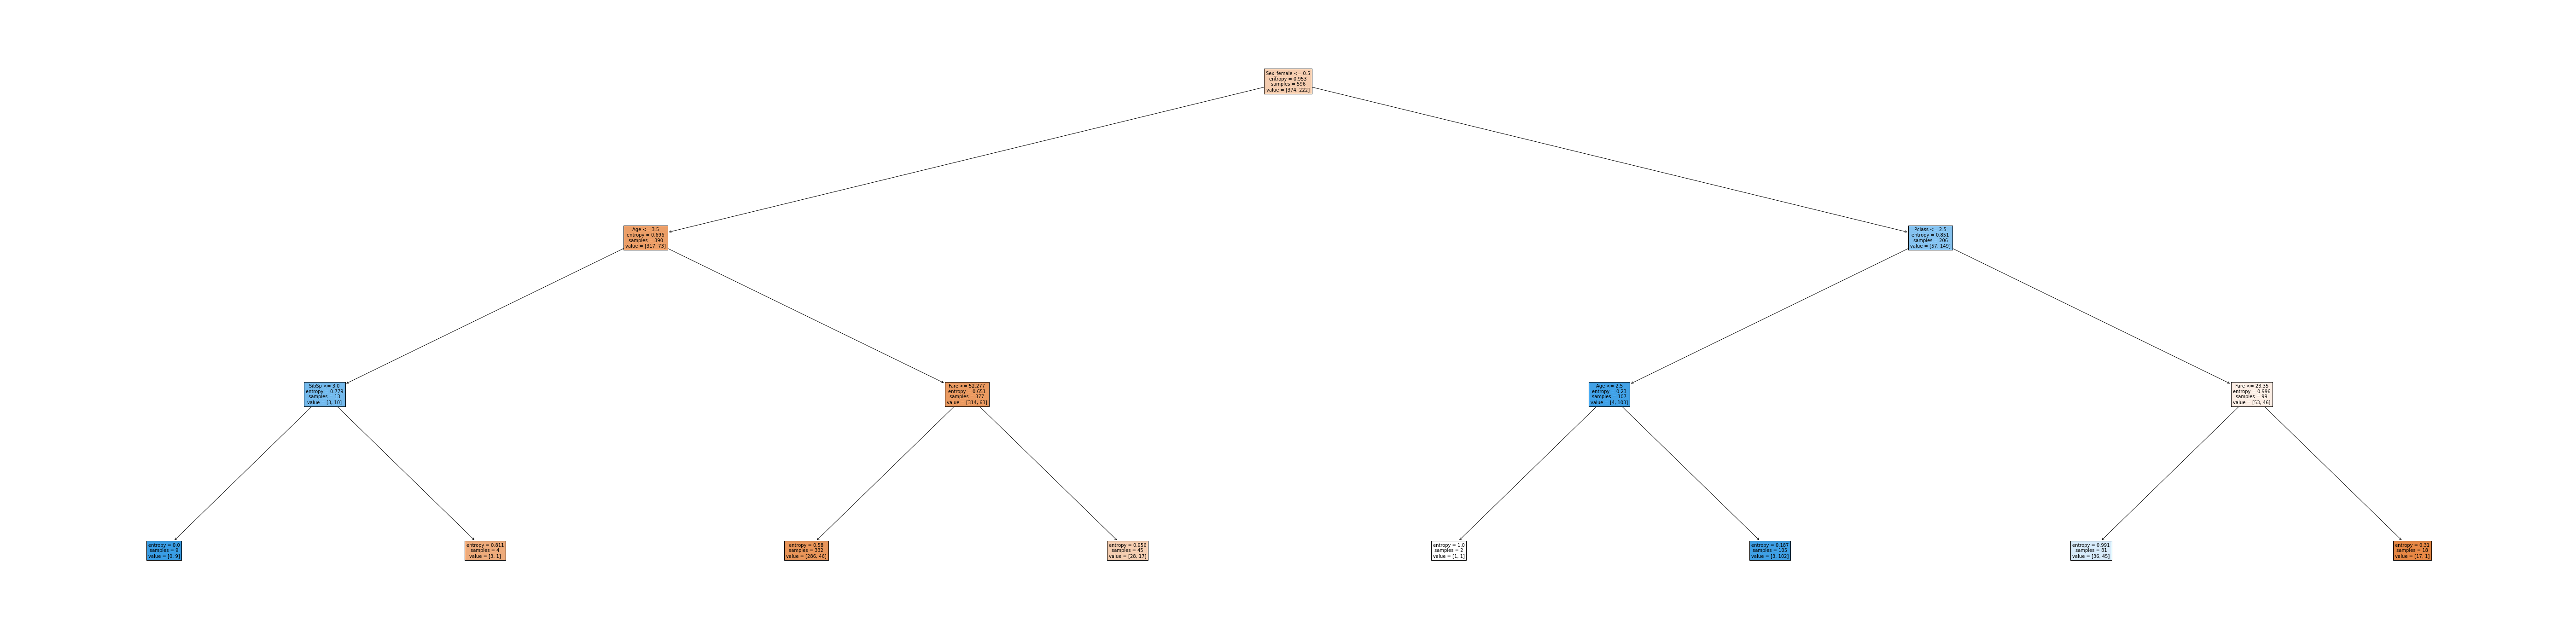

In [17]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)

In [18]:
clf.score(X_test,y_test)

0.8203389830508474

In [19]:
scores_data = pd.DataFrame()

In [20]:
max_depth_values = range(1,100)

In [ ]:
for max_depth in max_depth_values : # создаём цикл 
        clf = clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth) # 
        clf.fit(X_train, y_train)
        test_score = clf.score(X_test,y_test)
        train_score = clf.score(X_train, y_train)
        
        temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                        'train_score' : [train_score],
                                        'test_score' : [test_score]})
        scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.shape

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', "test_score"], 
                            var_name='set_type', value_name='score')

In [ ]:
scores_data_long.shape


In [ ]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [ ]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)

In [ ]:
scores_data.plot(x='max_depth', y='test_score', legend = True)

In [22]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [ ]:
cross_val_score(clf, X_train, y_train, cv = 10).mean()

In [35]:
for max_depth in max_depth_values : # создаём цикл 
        clf = clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth) # 
        clf.fit(X_train, y_train)
        test_score = clf.score(X_test,y_test)
        train_score = clf.score(X_train, y_train)
        
        mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 10).mean()
        
        temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                        'train_score' : [train_score],
                                        'test_score' : [test_score],
                                        'cross_val_score' : [mean_cross_val_score]})
        scores_data = scores_data.append(temp_score_data)

In [36]:
scores_data.head(10)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031
0,6,0.867450,0.766102,0.798711
0,7,0.882550,0.779661,0.802059
0,8,0.907718,0.803390,0.797003
0,9,0.917785,0.806780,0.791947
0,10,0.926174,0.800000,0.800350


In [37]:
scores_data.shape

(198, 4)

In [38]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', "test_score", "cross_val_score"], 
                            var_name='set_type', value_name='score')

In [39]:
scores_data_long.shape

(594, 3)

In [47]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [46]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
396,1,cross_val_score,0.781961
397,2,cross_val_score,0.770196
398,3,cross_val_score,0.790322
399,4,cross_val_score,0.788627
400,5,cross_val_score,0.797031
401,6,cross_val_score,0.798711
402,7,cross_val_score,0.802059
403,8,cross_val_score,0.797003
404,9,cross_val_score,0.791947
405,10,cross_val_score,0.800350


<AxesSubplot:xlabel='max_depth', ylabel='score'>

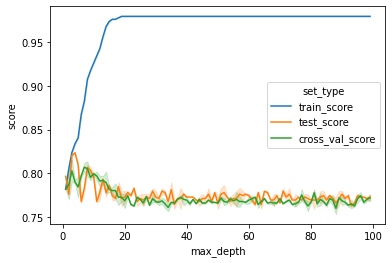

In [41]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

[Text(3188.075019409938, 1325.025, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(1674.1624611801242, 1257.075, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(880.539596273292, 1189.125, 'SibSp <= 3.0\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(834.3284161490683, 1121.175, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(926.7507763975156, 1121.175, 'Age <= 2.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(880.539596273292, 1053.225, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(972.9619565217391, 1053.225, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(2467.7853260869565, 1189.125, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(1111.59549689441, 1121.175, 'Fare <= 36.877\nentropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(1065.3843167701864, 1053.225, 'Pclass <= 1.5\nentropy = 0.601\nsamples = 314\nvalue = [268, 46]'),
 Text(207.9503105590062, 985.275, '

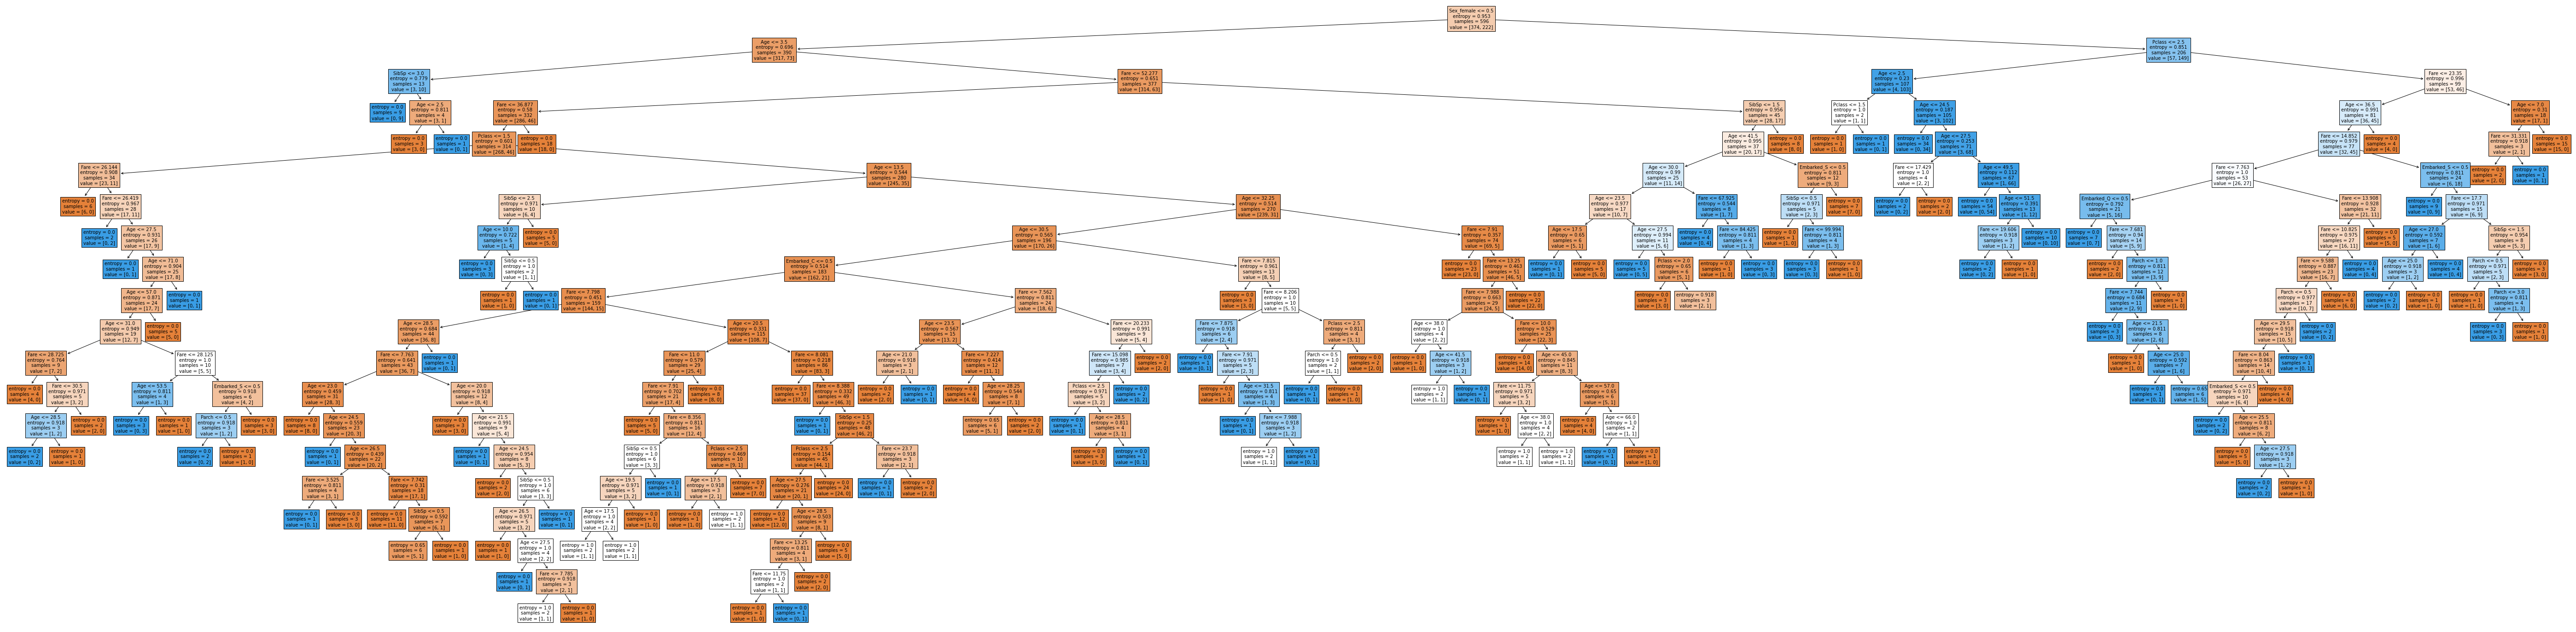

In [33]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X_train), filled=True)

In [49]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [50]:
best_clf.fit ( X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [51]:
best_clf.score( X_test, y_test)

0.8